In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 데이터 생성
# 임의 데이터 생성

np.random.seed( seed = 0 ) #난수 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) # 입력 데이터
T = np.zeros(X_n, dtype = np.uint8) # 목표 데이터
Dist_s = [0.4, 0.8] #분포의 시작지점
Dist_w = [0.8, 1.6] #분포의 폭
Pi = 0.5 #클래스 0의 비율

for n in range(X_n):
  wk = np.random.rand()
  T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi)
  # (A) 암컷이 될 확률 Pi = 0.5로 하여 무작위로 결정

  X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]
  # wk < Pi이면 0*1+1 * 0=0, wk>= 이면 0.8 ~2.4 의 균일한 분포에서 질량을 샘플링

  # 데이터 표시

print('X = ' + str(np.round(X, 2)))
print('T = ' + str(T))

X = [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T = [1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


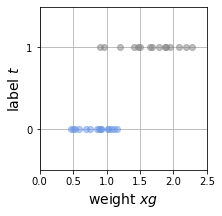

In [3]:
# 리스트 6-1-(2)
# 데이터 분포 표시
def show_data1(x, t):
    K = np.max(t) + 1
    
    for k in range(K): # (A)
        plt.plot(x[t == k], t[t == k], X_col[k], 
                 alpha = 0.5, linestyle = 'none', marker = 'o')
        # t == k 일 때, x 와 t만을 추출하여 플롯하는 명령
        # 즉, x[t==0] 을 사용하면 t == 0을 채우는 인덱스만 추출 되므로 매우 편리
        plt.grid(True)
        plt.ylim(-.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0, 1])
        plt.xlabel('weight $xg$', fontsize = 14)
        plt.ylabel('label $t$', fontsize =14)
        
# 메인
fig = plt.figure(figsize = (3, 3))
show_data1(X, T)
# plt.show()

In [4]:
def logistic(x, w):
    y = 1 / (1+ np.exp(-(w[0] * x +w[1] ) ))
    return y

1.25

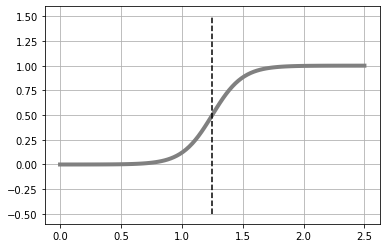

In [5]:
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb,y,color='gray', linewidth= 4)
    # 결정 경계 (decision line)
    i=np.min(np.where(y > 0.5))
    # np.where(y > 0.5) y > 0.5를 만족하는 y의 인덱스 넘버를 모두 반환한다.
    # min 함수를 통하여 인덱스 번호중 가장 작은 값을 구한다.
    B = (xb[i-1] + xb[i]) / 2
    # y가 0.5를 넘은 직후의 xb[i] 와 그 직전 xb[i-1] 의 평균이 결정 경계의 근사치로서 B에 저장
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle = '--' )
    plt.grid(True)
    return B

W = [8, -10]
show_logistic(W)

In [6]:
# 리스트 6-1-(5)
# 평균 교차 엔트로피 오차(cross-entropy error function)
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee=0
    
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1- t[n]) *np.log(1 -y[n]))
    cee = cee/X_n #평균교차 엔트로피오차
    return cee

# test
W = [1,1]
cee_logistic(W, X, T)
    

1.0288191541851066

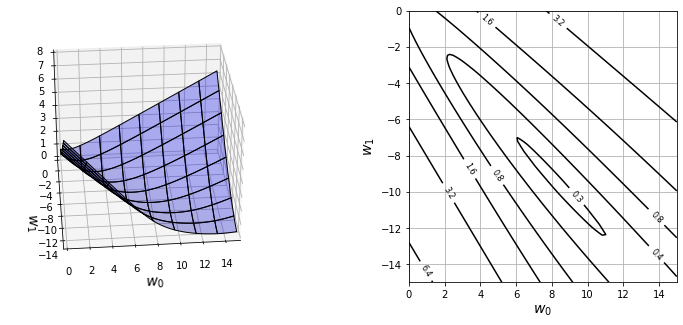

In [7]:
# 리스트 6-1-(6)
# 평균 교차 엔트로피 오차의 plot
from mpl_toolkits.mplot3d import Axes3D

# 계산
xn = 80 # 등고선의 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
x0 = np.linspace(w_range[0, 0], w_range[0, 1], xn)
x1 = np.linspace(w_range[1, 0], w_range[1,1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C =np.zeros((len(x1), len(x0)))
w = np.zeros(2)

for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1, i0] = cee_logistic(w, X, T)

        
# 표시
plt.figure(figsize = (12, 5))
#plt.figure(figsize = (9.5, 4))
plt.subplots_adjust(wspace = 0.5)
ax = plt.subplot(1, 2, 1, projection = '3d')
ax.plot_surface(xx0, xx1, C, color = 'blue', edgecolor = 'black', rstride = 10, cstride = 10, alpha = 0.3)
ax.set_xlabel('$w_0$', fontsize = 14)
ax.set_ylabel('$w_1$', fontsize = 14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors = 'black', levels = [0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt = '%1.1f', fontsize = 8)
plt.xlabel('$w_0$', fontsize = 14)
plt.ylabel('$w_1$', fontsize = 14)
plt.grid(True)
plt.show()

In [8]:
#리스트 6-1-(7)
# 평균 교차 엔트로피 오차의 미분
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee=np.zeros(2)

    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    
    dcee = dcee/X_n
    return dcee

w = [1, 1]
dcee_logistic(W, X, T)
    

array([0.30857905, 0.39485474])

w0 =  8.18, w1 = -9.38
CEE =  0.25
Boundary =  1.15 g


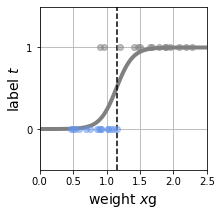

In [9]:
# 리스트 6-1-(8)
# 로지스틱 회귀 모델의 경사 하강법에 의한 해
from scipy.optimize import minimize

# 매개 변수 검색
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args = (x, t), \
                    jac = dcee_logistic, method = "CG")
    #  목적함수: 교차 엔트로피 함수(cee_logistic) 
    #  미분함수: jac = dcee_logistic
    #  경사하강법: method = "CG" 켤레 기울기법(Conjugate Gradient Method) 를 이용하여
    return res1.x


# 메인
plt.figure(1, figsize = (3, 3))
W_init = [1, -1]
W = fit_logistic(W_init, X, T)
print("w0 = {0: .2f}, w1 = {1: .2f}" .format(W[0], W[1]))
B = show_logistic(W)
show_data1(X, T)
plt.xlim(X_min, X_max)
plt.ylim(-.5, 1.5)
plt.xlabel('weight $x$g', fontsize = 14)
plt.ylabel('label $t$', fontsize = 14)
cee = cee_logistic(W, X, T)
print("CEE = {0: .2f}" .format(cee))
print("Boundary = {0: .2f} g". format(B))
plt.show()

In [10]:
%reset

In [11]:
# 리스트 6-2-(1)
# 2클래스의 분류와 3클래스의 분류 데이터 생서
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

np.random.seed(seed = 1)
N = 100 #데이터의 수
K = 3 # 분포 수
T3 = np.zeros((N,3), dtype = np.uint8)
T2 = np.zeros((N,2), dtype = np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] #X0 범위 표시용
X_range1 = [-3, 3] #X1 범위 표시용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) #분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) #분포의 분산
Pi = np.array([0.4, 0.8, 1]) # (A) 각 분포에 대한 비율 0.4 0.8 1

for n in range(N):
    wk = np.random.rand() # 0 ~ 1 사이의 균일한 분포의 난수를 생성하고 Pi[k] 보다 작으면 클래스 k 로 지정 1-of-K 부호화 방법
    for k in range(K): #B
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    
    for k in range(2):
        value = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])
        
        
        X[n, k] = value
        
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]
# pg. 10-7

In [12]:
print(X[:5, :])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [13]:
print(T2[:5, :])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [14]:
print(T3[:5, :])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


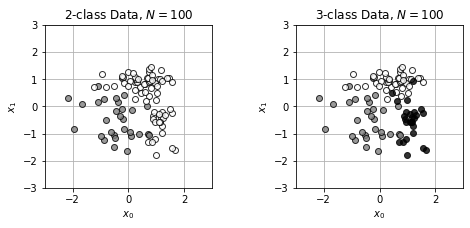

In [15]:
# 리스트 6-2-(5)
# 목적변수벡터  집합 T2 와  T3

# 데이터 표시
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]] # 컬러 값 설정
    #c = [[1, 0, 0], [0, 1, 0], [00, 0, 1]] # 컬러 값 설정 [r, g, b]
    
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1], linestyle = 'none', markeredgecolor = 'black', marker = 'o', color = c[k], alpha = 0.8)
        # K 값을 0, 1, 2로 바꾸어 주면서 부류벡터 t 에 접근 부류번호가 일치하는 인덱스드을 모두 찾아준다
        # 따라서, 부류가 0번인 샘플들의 (x1, x2) 위치에 포인트를 먼저 다 찍고, 그 다음 부류로 순차적으로 찍게 된다
    plt.grid(True)
    
    
# 메인
plt.figure(figsize = (7.5, 3))
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('2-class Data, $N=100$')

plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('3-class Data, $N=100$')
plt.show()

In [16]:
# 리스트 6-2-(6)
# 2D 로지스틱 회귀 모델
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp (-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

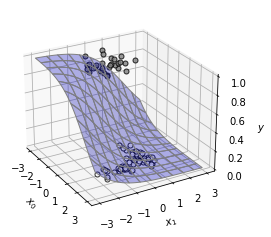

In [17]:
# 리스트 6-2-(7)
# 모델 3D 보기
# W=[-1, -1, -1] 일 경우 2차원 로지스틱 회귀 모델과 데이터
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color = 'blue', edgecolor = 'gray', rstride = 5, cstride = 5, alpha = 0.3)
    
def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i, marker = 'o', color = c[i], markeredgecolor = 'black', linestyle = 'none', markersize = 5, alpha = 0.8)
    
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.set_zlabel('$y$')
    Ax.view_init(elev = 25, azim = -30)

    
    
# test
Ax = plt.subplot(1, 1, 1, projection  = '3d')
W = [-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)

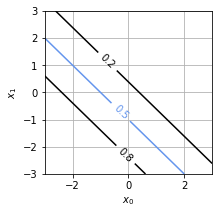

In [18]:
# 리스트 6-2-(8)
# 모델 2D 보기
# W=[-1, -1, -1] 일 경우 2차원 로지스틱 회귀 모델과 데이터
def show_contour_logistic2(w):
    xn = 30 # 매개 변수의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels = (0.2, 0.5, 0.8), colors = ['k', 'cornflowerblue', 'k'])
    cont.clabel(fmt = '%1.1f', fontsize = 10)
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.grid(True)
    
# test
plt.figure(figsize = (3, 3))
W = [-1, -1, -1]
show_contour_logistic2(W)

In [19]:
# 리스트 6-2-(10)
# 2차원 입력 2클래스 로지스틱 회귀 모델의 크로스 엔트로피 오차

def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2( x[:, 0], x[:, 1], w)
    cee=0
    
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) + (1- t[n, 0]) *np.log(1 -y[n]))
        
    cee = cee/X_n #평균교차 엔트로피오차
    return cee

In [20]:
#리스트 6-1-(10)
# 평균 교차 엔트로피 오차의 미분
def dcee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2( x[:, 0], x[:, 1], w)
    dcee=np.zeros(3)

    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0])
    
    dcee = dcee/X_n
    return dcee

#test
W = [-1, -1, -1]
dcee_logistic2(W, X, T2)
    

array([ 0.10272008,  0.04450983, -0.06307245])

In [21]:
# 리스트 6-2-(11)
from scipy.optimize import minimize

# 로지스틱 회귀 모델의 매개변수 검색

def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x,t),
        jac=dcee_logistic2, method= "CG")
    return res.x


w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE =  0.22


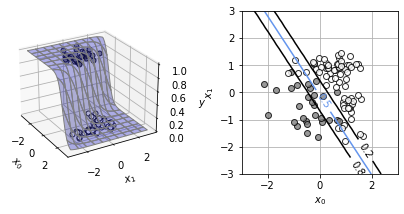

In [22]:
# 메인
plt.figure(1, figsize = (7, 3))
plt.subplots_adjust(wspace = 0.5)

Ax = plt.subplot(1, 2, 1, projection = '3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0: .2f}, w1 = {1: .2f}, w2 = {2: .2f}" .format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)
Ax.set_xlabel('$x_0$')
Ax.set_ylabel('$x_1$')

show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0: .2f}" .format(cee))

Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
Ax.set_xlabel('$x_0$')
Ax.set_ylabel('$x_1$')
plt.show()

In [23]:
# 리스트 4-4-(7)
def softmax(x0, x1, x2):
    u = np.exp(x0) + np.exp(x1) + np.exp(x2)
    return np.exp(x0) / u, np.exp(x1) / u, np.exp(x2) / u

y = softmax(x0=2, x1=1, x2=-1)
print(np.round(y, 2))
print(np.sum(y))

[0.71 0.26 0.04]
1.0


In [24]:
# 리스트 6-2-(12)
# 3클래스용 로지스틱 회귀 모델
# 시그모이드 대신 소프트맥스 함수를 사용하게 된다

def logistic3(x0, x1, w):
    K = 3
    w = w.reshape((3,3))
    n = len(x1)
    y = np.zeros((n, K))

    for k in range(K): #X_n의 a_k를 구하는 부분 shape = 10 x 3
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])

    wk = np.sum(y, axis= 1) # X_n의 u를 구하는 부분 shape = 1, 10
    wk = y.T / wk  # y.T(shape= 3 x 10)
    y= wk.T # y(shape= 10 x 3)
    return y
    
#test
W= np.array([1,2,3,4,5,6,7,8,9])
y = logistic3(X[:10, 0], X[:10, 1], W)
# X[0] ~ X[9]의 10개의 데이터 입력으로 한 출력
print(np.round(y, 3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]
 [0.    0.    1.   ]
 [0.019 0.126 0.856]
 [0.    0.002 0.998]
 [0.    0.002 0.998]
 [0.01  0.095 0.894]
 [0.    0.001 0.999]
 [0.003 0.05  0.948]]


In [32]:
#리스트 6-1-(13)
# 교차 엔트로피 오차
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3( x[:, 0], x[:, 1], w)
    cee=0
    N, K = y.shape
    
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
        
    cee = cee/X_n #평균교차 엔트로피오차
    return cee

#test
W = np.array([1,2,3,4,5,6,7,8,9])
cee_logistic3(W, X, T3)

3.9824582404787288

In [26]:
#리스트 6-1-(14)
# 교차 엔트로피 오차의 미분
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3( x[:, 0], x[:, 1], w)
    dcee=np.zeros((3, 3)) # (클래스의 수 K) * (x의 차원 D + 1)

    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k]) * np.r_[x[n, :], 1]

    dcee = dcee/X_n
    return dcee.reshape(-1)

#test
W= np.array([1,2,3,4,5,6,7,8,9])
dcee_logistic3(W, X, T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

In [27]:
# 리스트 6-2-(15)
# 매개변수 검색
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x,t),
        jac=dcee_logistic3, method= "CG")
    return res.x

In [28]:
# 리스트 6-2-(16)
# 모델 등고선 2D 표시
# 가중치 매개 변수 w를 전달하면 표시할 입력 공간을 
# 30 x 30 으로 분할하여 모든 입력에 대해 네트워크의 출력을 확인
# 그리고 각가의 카테고리에서 0.5 또는 0.9 이상의 출력을 얻을 수 영역을 등고선으로 표시
def show_contour_logistic3(w):
    xn = 30 # 매개변수의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    
    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        
        for j in range(3):
            y[:, i, j] = wk[:, j]
            
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j], levels = (0.5, 0.9), colors = ['cornflowerblue', 'k'])
        cont.clabel(fmt = '%1.1f', fontsize = 9)
    
    plt.grid(True)

[-3.2  -2.69  2.25 -0.49  4.8  -0.69  3.68 -2.11 -1.56]
reshaped
[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE =  0.23


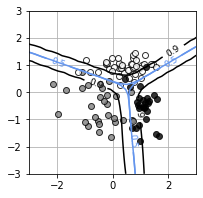

In [33]:
#리스트 6-2-(17)
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W, 2))
print("reshaped")
print(np.round(W.reshape((3,3)), 2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0: .2f}" .format(cee))

plt.figure(figsize= (3,3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()